<a href="https://colab.research.google.com/github/DatadevWil/Estudo/blob/main/King_County_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.


In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [ ]:
base = pd.read_csv("kc_house_data.csv")
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
base.shape

(21613, 21)

In [ ]:
base['date'] = base['date'].apply(lambda x : x.split('T')[0])

In [ ]:
base.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
base['date'] = base['date'].apply(lambda x : f'{x[0:4]}-{x[4:6]}-{x[6:]}')

In [ ]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
base = base.rename({'date': 'Data'}, axis = 1)
base.head()

,id,Data,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
base = base.rename({'price': 'Preço','bedrooms': 'Quartos'}, axis = 1)
base.head()

,id,Data,Preço,Quartos,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
base = base.rename({'bathrooms': 'Banheiros','sqft_living':'Metragem_casa','sqft_lot':'Metragem_lote','floors':'Andares','waterfront':'Vista_mar','view':'Visita','condition':'Condições','grade':'Nota','sqft_above':'Metragem_superior','sqft_basement':'Metragem_porão','yr_built':'Ano_construção','yr_renovated':'Ano_reforma','zipcode':'Código_postal','lat':'Latitude','long':'Longitude','sqft_living15':'Metragem_útil_2015','sqft_lot15':'Metragem_lote_2015'}, axis = 1)
base

,id,Data,Preço,Quartos,Banheiros,Metragem_casa,Metragem_lote,Andares,Vista_mar,Visita,Condições,Nota,Metragem_superior,Metragem_porão,Ano_construção,Ano_reforma,Código_postal,Latitude,Longitude,Metragem_útil_2015,Metragem_lote_2015
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
base['Preço'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Preço, dtype: float64

In [ ]:
amp_preco = max(base['Preço']) - min(base['Preço'])
amp_preco

7625000.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


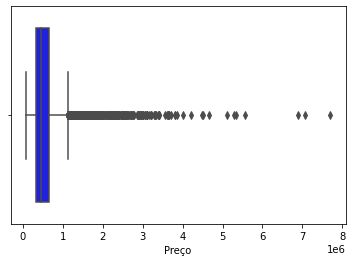

In [ ]:
#Observa-se que há uma grande quantidade de outliers
sns.boxplot(base.Preço,color='blue')

In [ ]:
stats.describe(base['Preço'])

DescribeResult(nobs=21613, minmax=(75000.0, 7700000.0), mean=540088.1417665294, variance=134782378397.24687, skewness=4.023789858140135, kurtosis=34.577262255687536)

In [ ]:
base.isnull().sum()

id                    0
Data                  0
Preço                 0
Quartos               0
Banheiros             0
Metragem_casa         0
Metragem_lote         0
Andares               0
Vista_mar             0
Visita                0
Condições             0
Nota                  0
Metragem_superior     0
Metragem_porão        0
Ano_construção        0
Ano_reforma           0
Código_postal         0
Latitude              0
Longitude             0
Metragem_útil_2015    0
Metragem_lote_2015    0
dtype: int64

In [ ]:
base.sort_values(by=['Nota'],ascending=False)


,id,Data,Preço,Quartos,Banheiros,Metragem_casa,Metragem_lote,Andares,Vista_mar,Visita,Condições,Nota,Metragem_superior,Metragem_porão,Ano_construção,Ano_reforma,Código_postal,Latitude,Longitude,Metragem_útil_2015,Metragem_lote_2015
7035,853200010,2014-07-01,3800000.0,5,5.50,7050,42840,1.0,0,2,4,13,4320,2730,1978,0,98004,47.6229,-122.220,5070,20570
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4811,9831200500,2015-03-04,2479000.0,5,3.75,6810,7500,2.5,0,0,3,13,6110,700,1922,0,98102,47.6285,-122.322,2660,7500
13411,2426039123,2015-01-30,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362,2740,10761
14556,2303900035,2014-06-11,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18379,1222029077,2014-10-29,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
3223,2420069251,2015-02-25,262000.0,1,0.75,520,12981,1.0,0,0,5,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
5832,5702500050,2014-11-04,280000.0,1,0.00,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
1149,3421079032,2015-02-17,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882


Características da casa com maior nota --> Tem 5 quartos, mais de 5 banheiros, não tem vista para o mar, não é a casa com a maior nota de condição, foi construída em 1978

In [53]:
base_filtrada = base.query('Quartos == 0 & Banheiros == 0')
base_filtrada

,id,Data,Preço,Quartos,Banheiros,Metragem_casa,Metragem_lote,Andares,Vista_mar,Visita,Condições,Nota,Metragem_superior,Metragem_porão,Ano_construção,Ano_reforma,Código_postal,Latitude,Longitude,Metragem_útil_2015,Metragem_lote_2015
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [54]:
#Retirei da base de dados as casas que não tinham quartos e banheiros, pois na minha opinião são dados errados dentro do dataframe
base_final = base.drop(base[(base.Quartos == 0) & (base.Banheiros == 0)].index)
base_final.shape

(21606, 21)

In [55]:
base_final.sort_values(by=['Nota'],ascending=False)

,id,Data,Preço,Quartos,Banheiros,Metragem_casa,Metragem_lote,Andares,Vista_mar,Visita,Condições,Nota,Metragem_superior,Metragem_porão,Ano_construção,Ano_reforma,Código_postal,Latitude,Longitude,Metragem_útil_2015,Metragem_lote_2015
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
5451,7237501190,2014-10-10,1780000.0,4,3.25,4890,13402,2.0,0,0,3,13,4890,0,2004,0,98059,47.5303,-122.131,5790,13539
13700,4139900180,2015-04-20,2340000.0,4,2.50,4500,35200,1.0,0,0,3,13,4500,0,1988,0,98006,47.5477,-122.126,4760,35200
19017,2303900100,2014-09-11,3800000.0,3,4.25,5510,35000,2.0,0,4,3,13,4910,600,1997,0,98177,47.7296,-122.370,3430,45302
14556,2303900035,2014-06-11,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
11588,6453300055,2014-10-07,188000.0,1,1.00,550,16345,1.0,0,0,3,4,550,0,1945,0,98106,47.5181,-122.339,1100,9240
5832,5702500050,2014-11-04,280000.0,1,0.00,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
3223,2420069251,2015-02-25,262000.0,1,0.75,520,12981,1.0,0,0,5,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


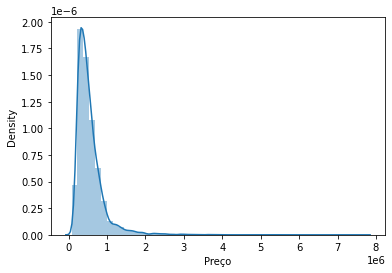

In [56]:
sns.distplot(base['Preço'])